In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/lung cancer detection"

/content/drive/MyDrive/lung cancer detection


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/lung cancer detection/survey lung cancer.csv')

In [ ]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.shape

(309, 16)

In [ ]:
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.describe(include='object')

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.duplicated().sum()

33

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace = True)

In [ ]:
df['GENDER'] = df['GENDER'].replace(['M' , 'F'] , ['0' , '1'])
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace(['YES', 'NO'] , ['1' , '0'])

In [ ]:
df['LUNG_CANCER'].unique()

array(['1', '0'], dtype=object)

In [ ]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,238
0,38


In [ ]:
coluumns =['GENDER', 'AGE', 'SMOKING','YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for col in coluumns:
    d_type = df[col].dtype

    # Veri türünü ekrana yazdır
    print(f"Data type for {col}: {d_type}")

    counts = df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")



Data type for GENDER: object
Counts for GENDER:
GENDER
0    142
1    134
Name: count, dtype: int64
Data type for AGE: int64
Counts for AGE:
AGE
64    18
60    16
56    16
62    16
59    15
63    15
70    14
61    14
67    11
69    10
55    10
72    10
68     9
71     9
57     9
77     9
58     8
54     7
74     6
65     5
51     5
75     5
73     4
52     4
53     4
66     4
76     3
47     3
49     3
48     2
44     2
78     2
81     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
Data type for SMOKING: int64
Counts for SMOKING:
SMOKING
2    150
1    126
Name: count, dtype: int64
Data type for YELLOW_FINGERS: int64
Counts for YELLOW_FINGERS:
YELLOW_FINGERS
2    159
1    117
Name: count, dtype: int64
Data type for ANXIETY: int64
Counts for ANXIETY:
ANXIETY
1    139
2    137
Name: count, dtype: int64
Data type for PEER_PRESSURE: int64
Counts for PEER_PRESSURE:
PEER_PRESSURE
2    140
1    136
Name: count, dtype: int64
Data type for CHRONIC DISEASE: int64

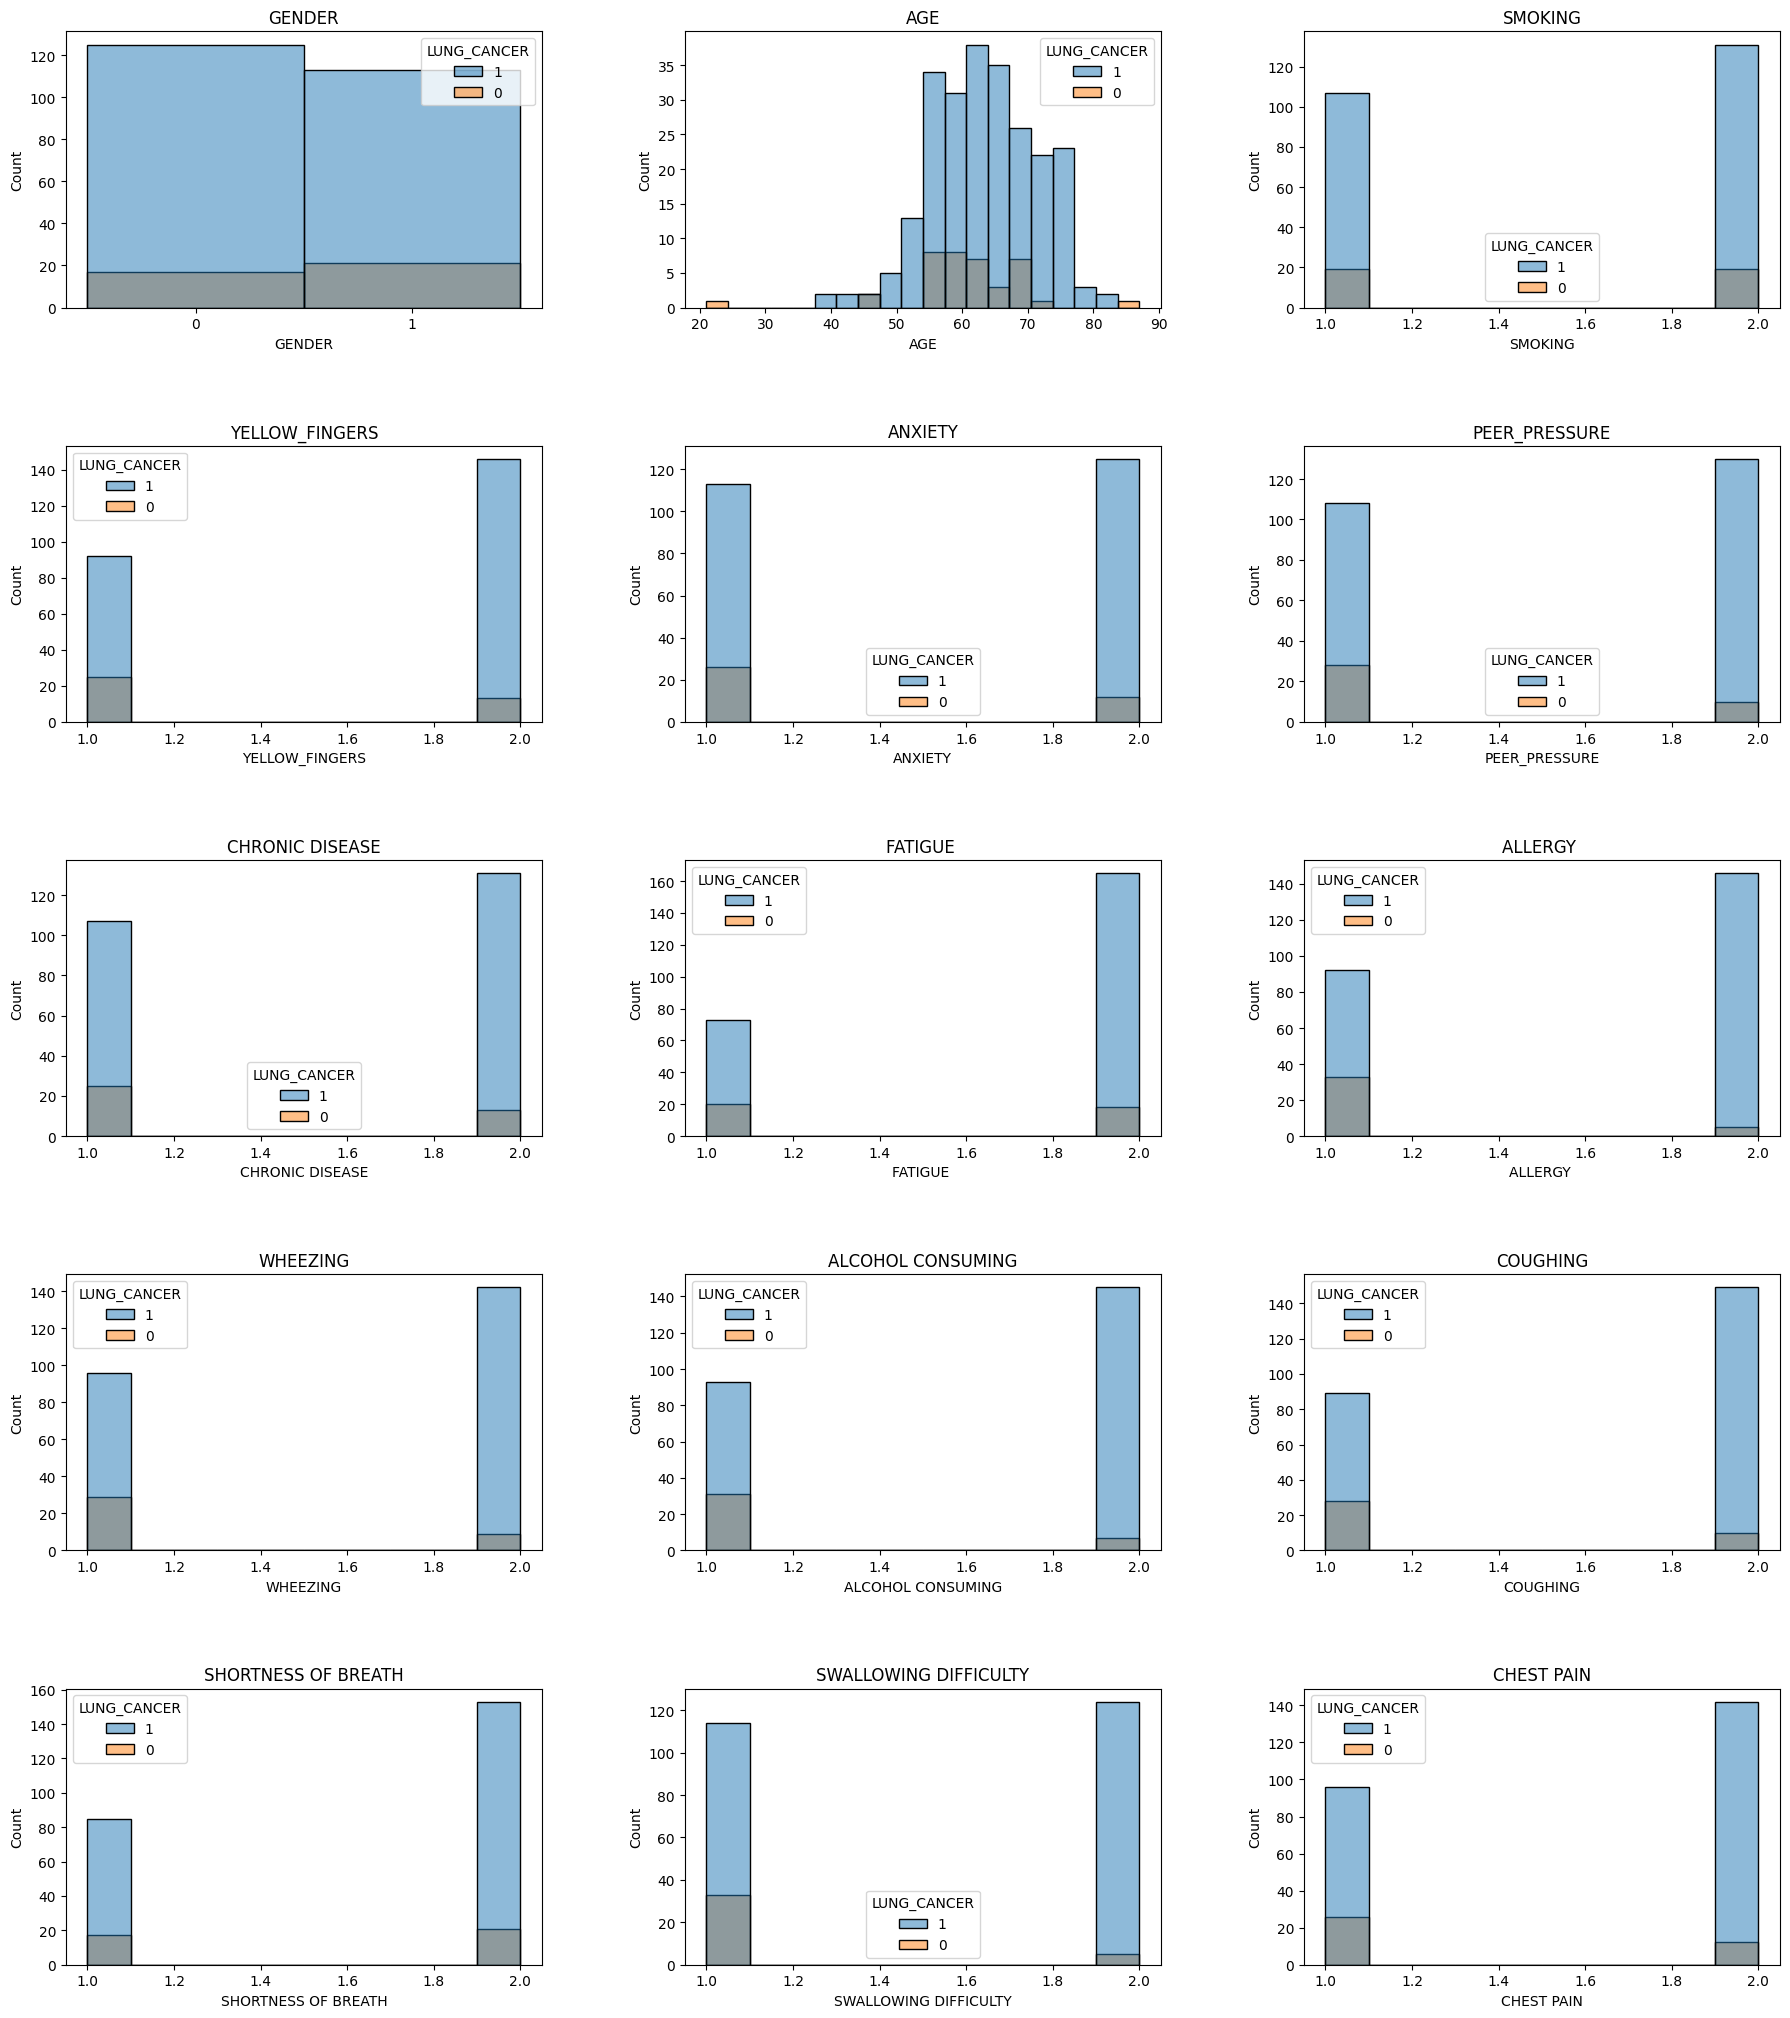

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_list = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
           'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
           'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
           'SWALLOWING DIFFICULTY', 'CHEST PAIN']

fig = plt.figure(figsize=(18, 24))  # Daha geniş bir figür boyutu

for i in range(len(num_list)):
    plt.subplot(6, 3, i+1)
    plt.title(num_list[i])
    sns.histplot(data=df, x=df[num_list[i]], hue='LUNG_CANCER')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Yükseklik ve genişlik boşluklarını ayarla
plt.show()


Text(0.5, 1.0, 'LUNG CANCER')

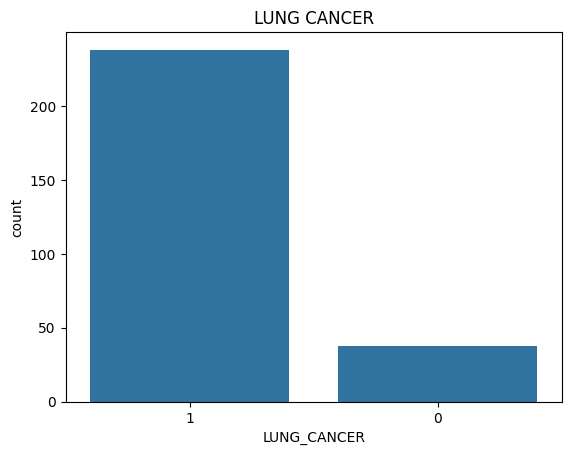

In [ ]:
sns.countplot(x=df['LUNG_CANCER'])
plt.title('LUNG CANCER')

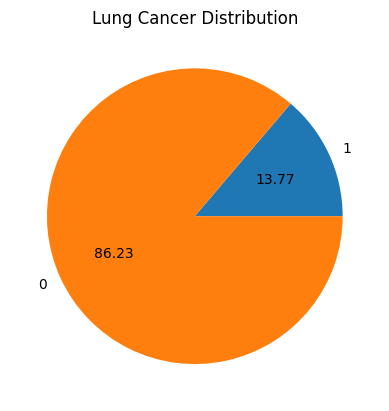

In [ ]:
plt.pie(df.groupby(by=["LUNG_CANCER"]).size(), labels = df["LUNG_CANCER"].unique(), autopct = "%0.2f")

plt.title('Lung Cancer Distribution');
plt.show()

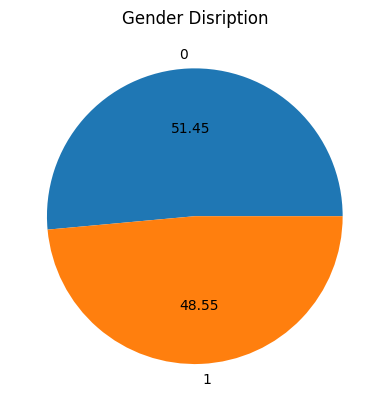

In [ ]:
plt.pie(df.groupby(by=["GENDER"]).size(), labels = df["GENDER"].unique(), autopct = "%0.2f")
plt.title('Gender Disription')
plt.show()

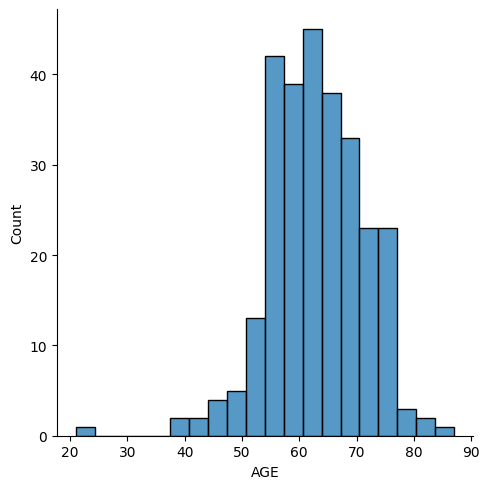

In [ ]:
sns.displot(df['AGE'])

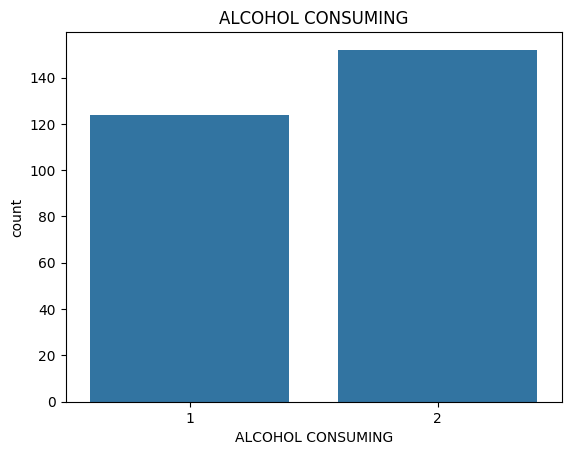

In [ ]:
sns.countplot(x=df['ALCOHOL CONSUMING'])
plt.title('ALCOHOL CONSUMING');

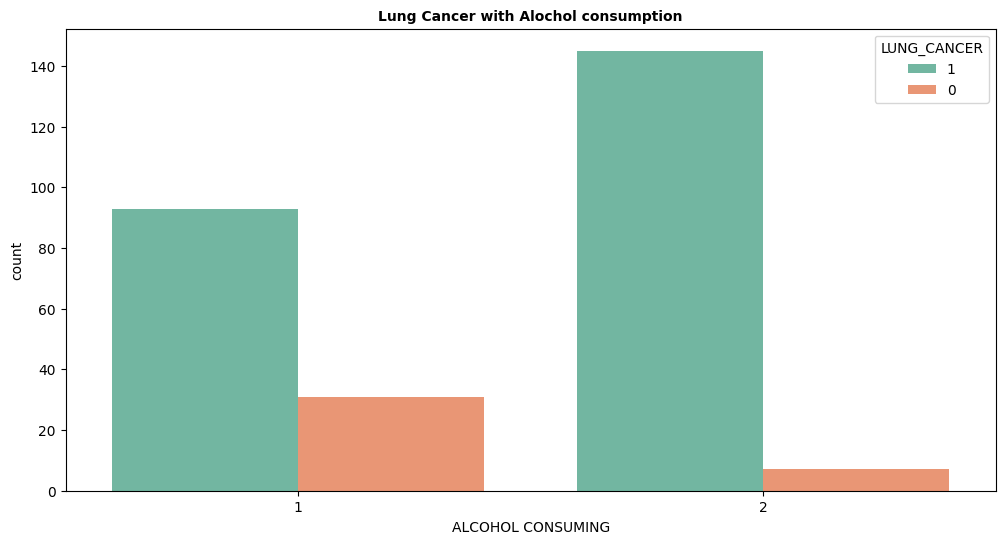

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='ALCOHOL CONSUMING',hue="LUNG_CANCER", data=df,palette='Set2')
plt.title("Lung Cancer with Alochol consumption",fontweight="bold", size=10)
plt.show()

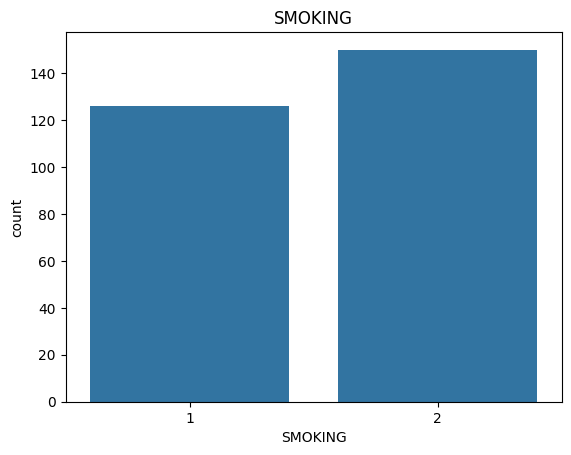

In [ ]:
sns.countplot(x=df['SMOKING'])
plt.title('SMOKING');

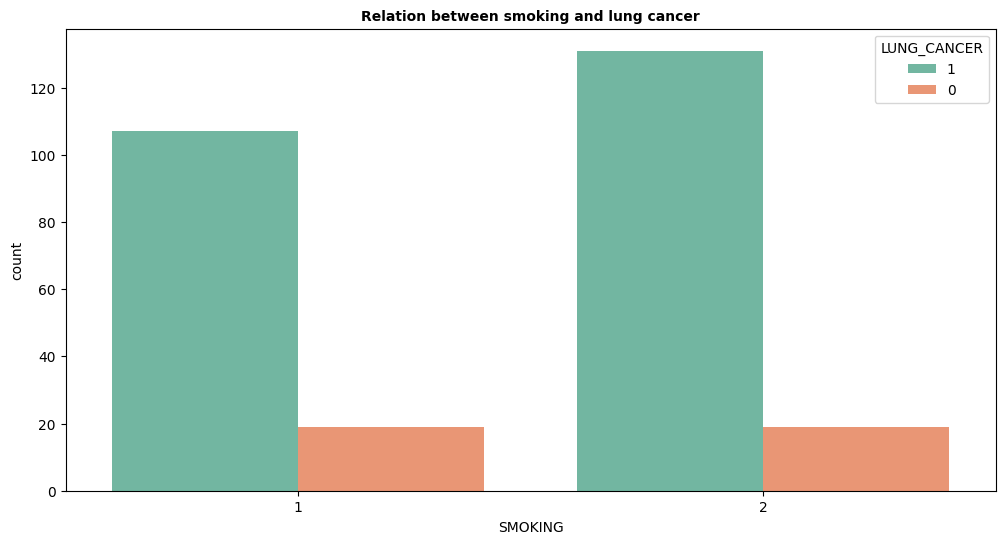

In [36]:
plt.figure(figsize=(12, 6))

sns.countplot(x='SMOKING',hue="LUNG_CANCER", data=df,palette='Set2')
plt.title("Relation between smoking and lung cancer",fontweight="bold", size=10)
plt.show()

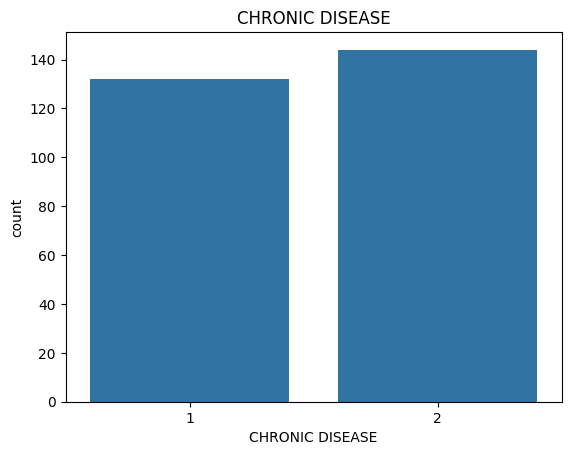

In [37]:
sns.countplot(x=df['CHRONIC DISEASE'])
plt.title('CHRONIC DISEASE');

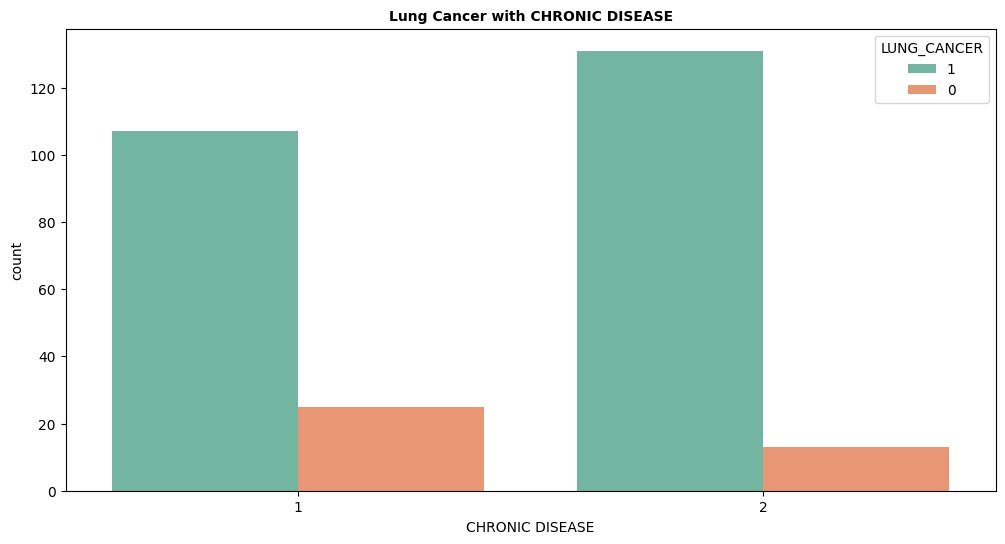

In [40]:
plt.figure(figsize=(12, 6))

sns.countplot(x='CHRONIC DISEASE',hue="LUNG_CANCER", data=df,palette='Set2')
plt.title("Lung Cancer with CHRONIC DISEASE",fontweight="bold", size=10)
plt.show()

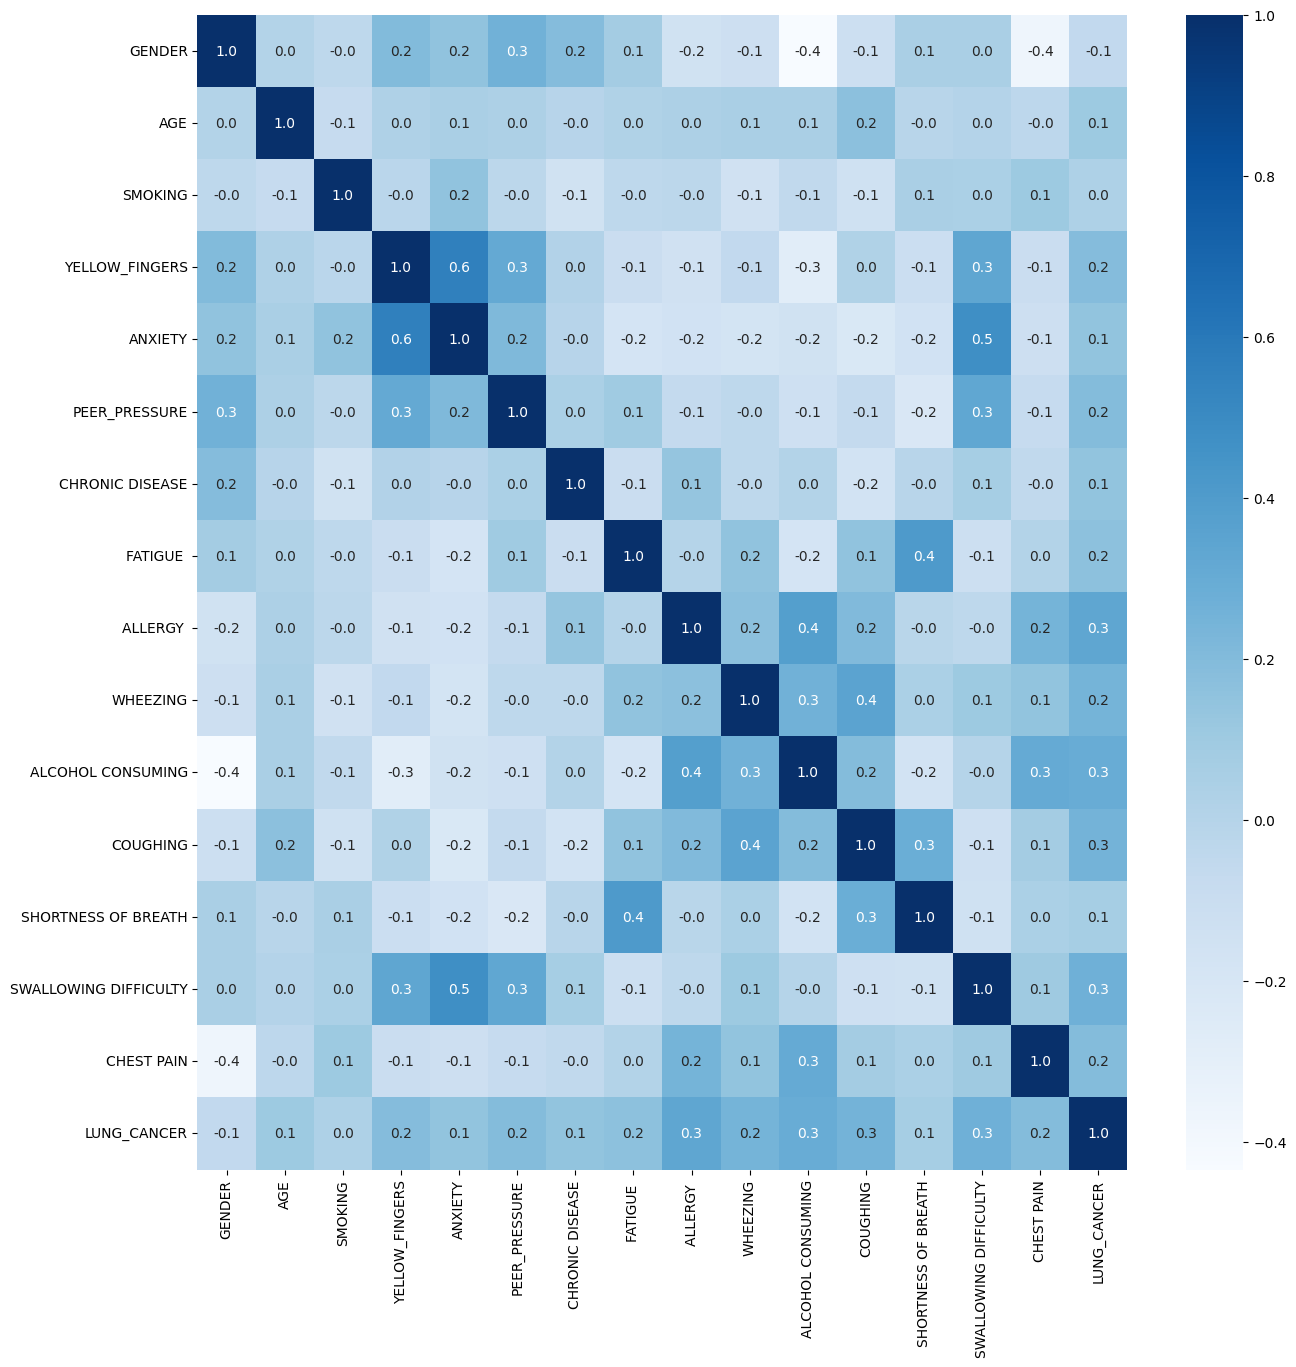

In [39]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');

In [41]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=78)

**SVM**

In [43]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
svc.score(X_train , y_train)

0.9363636363636364

In [45]:
svc_pred = svc.predict(X_test)
svc_acc=accuracy_score(y_test , svc_pred)
svc_acc

0.9107142857142857

In [46]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.92      0.98      0.95        45

    accuracy                           0.91        56
   macro avg       0.90      0.81      0.84        56
weighted avg       0.91      0.91      0.91        56



Text(95.72222222222221, 0.5, 'Truh')

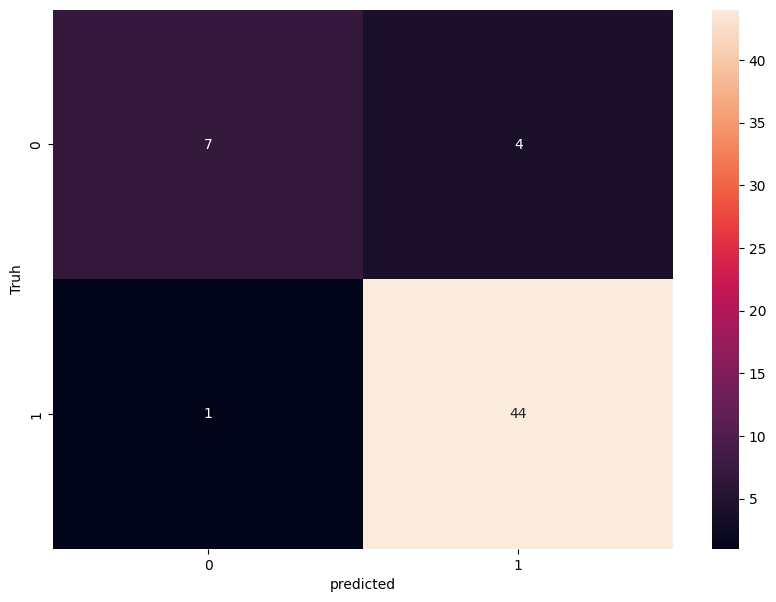

In [47]:
cm1 = confusion_matrix(y_test,svc_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

**Random Forest**

In [48]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [49]:
RF_model.score(X_train , y_train)

1.0

In [50]:
RF_pred =RF_model.predict(X_test)
RF_acc=accuracy_score(y_test , RF_pred)
RF_acc

0.875

In [51]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.88      0.98      0.93        45

    accuracy                           0.88        56
   macro avg       0.86      0.72      0.76        56
weighted avg       0.87      0.88      0.86        56



Text(95.72222222222221, 0.5, 'Truh')

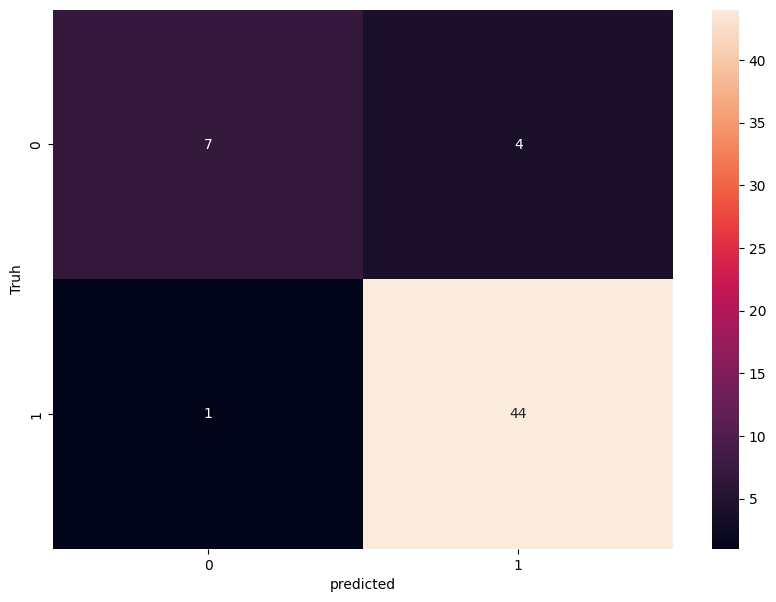

In [52]:
cm2 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

**Decision Tree**

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
dt.score(X_train , y_train)

1.0

In [55]:
dt_pred = dt.predict(X_test)

In [56]:
DT_acc=accuracy_score(y_test , dt_pred)
DT_acc

0.8214285714285714

In [57]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.87      0.91      0.89        45

    accuracy                           0.82        56
   macro avg       0.71      0.68      0.70        56
weighted avg       0.81      0.82      0.81        56



Text(95.72222222222221, 0.5, 'Truth')

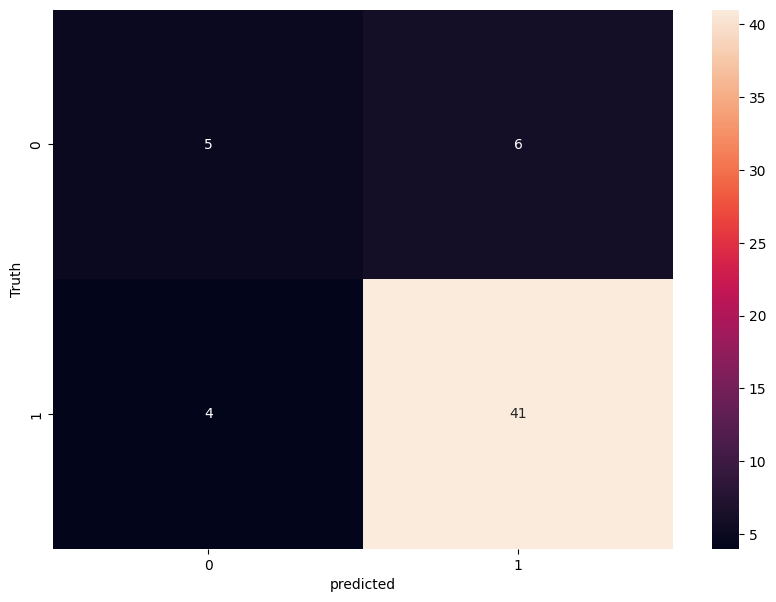

In [58]:
cm3 = confusion_matrix(y_test,dt_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

**Models Scores**

In [59]:
models=pd.DataFrame({
    'models':['Random_forest','SVC','Decsion_Treee'],
    'scores':[RF_acc,svc_acc,DT_acc]})
models.sort_values(by='scores',ascending=True)

,models,scores
2,Decsion_Treee,0.821429
0,Random_forest,0.875000
1,SVC,0.910714
